# Capstone Project - NYC Battle of the Neighborhoods
### Applied Data Science Capstone by IBM/Coursera

This notebook is a capstone project for Data Science specialization powered by Coursera. [Data Science Specialization](https://www.coursera.org/specializations/ibm-data-science-professional-certificate)  
This project will try to solve a problem or question by applying data science methods on the location data gotten from external Databases.

By 
<a href="https://www.linkedin.com/in/tawfikghozzi/"> Taoufik Ghozzi </a>
--------

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results](#results)
* [Discussion](#discussion)
* [Conclusion](#conclusion)
* [References](#references)

### **A. Introduction** <a name="introduction"></a>

#### **A.1. Business Problem**

New York is one of the largest metropolises in the world where over 8 millions people live and it has a population density of **10,715** people per square kilometer. As a resident of this city, I decided to use New York in my project. The city is divided into **5** main districts in total. However, the fact that the districts are squeezed into an area of approximately **783** square kilometers causes the city to have a very intertwined and mixed structure [1].

As you can see from the figures, New York is a city with a high population and population density. Being such a crowded city leads the owners of shops and social sharing places in the city where the population is dense. When we think of it by the investor, we expect from them to prefer the districts where there is a lower real estate cost and the type of business they want to install is less intense. If we think of the city residents, they may want to choose the regions where real estate values are lower, too. At the same time, they may want to choose the district according to the social places density. However, it is difficult to obtain information that will guide investors in this direction, nowadays.

When we consider all these problems, we can create a map and information chart where the real estate index is placed on New York and each district is clustered according to the venue density.

#### **A.2. Project Summary**
Using data science techniques to analyze the following questions:  
- Is the surrounding venues can effect the price of real estates?  
- What kind of surrounding venues, and to what extend, can effect the price?  
- Can we use the surrounding venue to estimate the value of an accommodation over the average price of one area? And to what degree of confidence?  

The data will be:
- Average price of 1 Standard residential Unit in New York city's neighborhoods. ([kaggle](https://www.kaggle.com/new-york-city/nyc-property-sales))
- Venues surrounding each neighborhoods. ([FourSquare API](https://developer.foursquare.com/))  

Target audiences will be:
- Home buyers, who can roughly estimate the value of a target house over the average.  
- Planners, who can decide which venues to place around their product, so that the price is maximized.  
- Any normal person, who is wondering if that in-process building will effect his/her home's value.

### **B. Data** <a name="data"></a>

#### **B.1. Importing Needed Libreries**

In [1]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab

!conda install -c conda-forge folium=0.7.0 --yes # uncomment this line if you haven't completed the Foursquare API lab

print('Libraries installed!')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    numpy-1.17.3               |   py36h95a1406_0         5.2 MB  conda-forge
    sci

In [2]:
# importing dataset processing modules
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# importing HTTP and web processing modules
import requests
import json

# importing map visualization modules
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium # map rendering library

# importing data plotting modules
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# importing Machine Learning modules
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist


print('Libraries imported!')

Libraries imported!


#### **B.2. Download and explore NYC  Real Estate data** 

I will be using NYC real estate data from https://www.kaggle.com/new-york-city/nyc-property-sales, where shows properties sold in New York City over a 12-month period from September 2016 to September 2017.The full raw data been dowloaded in csv format and uploaded to project repository in ***github***, in next i will download the **nyc-sales.csv** file and forming the main dataset **df** for further processing.

In [3]:
url = 'https://github.com/tgh101/nyc_hsp_project/raw/master/nyc-sales.csv'

df = pd.read_csv(url)

print('Data downloaded!')

Data downloaded!


In [4]:
df.shape

(84548, 22)

This raw data contain alot of entries. with alot of columns of data.

In [5]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


I will be focusing only in **Residential** properties, i will filter *single unit properties*  only with no more then **10M$** as value.

First I will need to focuse only in **BOROUGH**, **NEIGHBORHOOD** and **SALE PRICE** from the raw database

In [6]:
df = df[df['RESIDENTIAL UNITS'].isin([0,1]) & (df['COMMERCIAL UNITS'] == 0) & (df['COMMERCIAL UNITS'] == 0)]
df = df[['BOROUGH', 'NEIGHBORHOOD', 'SALE PRICE']]
df.head()

,BOROUGH,NEIGHBORHOOD,SALE PRICE
12,1,ALPHABET CITY,1
13,1,ALPHABET CITY,499000
14,1,ALPHABET CITY,10
15,1,ALPHABET CITY,529500
16,1,ALPHABET CITY,423000


Next, i will focus to clean all **SALE PRICE** and for sake of simplification, i will focus in this project only on properties price between **100K USD** and **10M USD** only. 

In [7]:
# drop all undefined prices
df.drop(df.loc[df['SALE PRICE']==' -  '].index, inplace=True)

# Convert all the prices to numerical values
df = df.astype({'SALE PRICE': int})
df = df.sort_values(by='SALE PRICE', ascending=True, na_position='first')

# drop all prices below 100K and above 10M USD
df.drop(df.loc[df['SALE PRICE']< 100000].index, inplace=True)
df.drop(df.loc[df['SALE PRICE']> 5000000].index, inplace=True)

df.head()

,BOROUGH,NEIGHBORHOOD,SALE PRICE
70928,4,RIDGEWOOD,100000
62940,4,HOLLISWOOD,100000
30660,3,BRIGHTON BEACH,100000
38370,3,FLATBUSH-EAST,100000
6075,1,HARLEM-UPPER,100000


In [8]:
pd.DataFrame(df['NEIGHBORHOOD'].unique())

,0
0,RIDGEWOOD
1,HOLLISWOOD
2,BRIGHTON BEACH
3,FLATBUSH-EAST
4,HARLEM-UPPER
5,ANNADALE
6,BAYSIDE
7,CORONA
8,OCEAN PARKWAY-NORTH
9,OZONE PARK


By checking the full list of Neighborhood, i can see some irregular names need to be unified or cleared.

In [9]:
df.NEIGHBORHOOD.loc[df.NEIGHBORHOOD.str.contains('UPPER EAST SIDE')] = 'UPPER EAST SIDE'
df.NEIGHBORHOOD.loc[df.NEIGHBORHOOD.str.contains('UPPER WEST SIDE')] = 'UPPER WEST SIDE'
df.NEIGHBORHOOD.loc[df.NEIGHBORHOOD.str.contains('WASHINGTON HEIGHTS')] = 'WASHINGTON HEIGHTS'

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Since we have multipule sales per neighborhood, we need to calulate **AHP**(**A**verage **H**ome **P**ricing) per neighborhood

In [10]:
df = df.groupby(df['NEIGHBORHOOD'], as_index=False).mean()
df.rename(columns = {'SALE PRICE': 'AHP'}, inplace=True)
df.head()

,NEIGHBORHOOD,BOROUGH,AHP
0,AIRPORT LA GUARDIA,4.0,4.553750e+05
1,ALPHABET CITY,1.0,1.098765e+06
2,ANNADALE,5.0,5.767961e+05
3,ARDEN HEIGHTS,5.0,3.798375e+05
4,ARROCHAR,5.0,5.210875e+05


Time to convert **BOROUGH**, from numerical values to text names according to the folowing mapping:
- **MANHATTAN** : 1
- **BRONX** : 2
- **BROOKLYN** : 3
- **QUEENS** : 4
- **STATEN ISLAND** : 5

In [11]:
df.BOROUGH.loc[df.BOROUGH==1] = 'MANHATTAN'
df.BOROUGH.loc[df.BOROUGH==2] = 'BRONX'
df.BOROUGH.loc[df.BOROUGH==3] = 'BROOKLYN'
df.BOROUGH.loc[df.BOROUGH==4] = 'QUEENS'
df.BOROUGH.loc[df.BOROUGH==5] = 'STATEN ISLAND'

Rearranging the dataset columns and reformatting the contains to proper format:

In [12]:
# rearranging columns
new_col_order = ['BOROUGH', 'NEIGHBORHOOD', 'AHP']
df = df[new_col_order]
df = df.astype({'AHP': int})

# reformatting the containt
df.rename(columns = {'BOROUGH':'Borough', 'NEIGHBORHOOD':'Neighborhood'}, inplace=True)
df['Borough'] = df['Borough'].str.capitalize() 
df['Neighborhood'] = df['Neighborhood'].str.capitalize() 

df.head()

,Borough,Neighborhood,AHP
0,Queens,Airport la guardia,455375
1,Manhattan,Alphabet city,1098764
2,Staten island,Annadale,576796
3,Staten island,Arden heights,379837
4,Staten island,Arrochar,521087


In [13]:
df.shape

(246, 3)

#### B.3. Download and Explore NYC Neighborhoods Dataset

NYC has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood. 

Luckily, this dataset exists for free on the web. Feel free to try to find this dataset on your own, but here is the link to the dataset: https://geo.nyu.edu/catalog/nyu_2451_34572

For your convenience, I downloaded the files and placed it on the server, so you can simply run a `wget` command and access the data. So let's go ahead and do that.

In [14]:
!wget -q -O 'nyc_neigh_loca.json' https://github.com/tgh101/nyc_hsp_project/raw/master/nyc_neigh_loca.json
print('Data downloaded!')

Data downloaded!


Next, let's load the data.

In [15]:
with open('nyc_neigh_loca.json') as json_data:
    nyc_neigh_loca = json.load(json_data)

Notice how all the relevant data is in the *features* key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.

In [16]:
neighborhoods_data = nyc_neigh_loca['features']

Let's take a look at the first item in this list.

In [17]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

The next task is essentially transforming this data of nested Python dictionaries into a ***pandas dataframe***. So let's start by creating an empty dataframe.

In [18]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

Take a look at the empty dataframe to confirm that the columns are as intended.

In [19]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


Then let's loop through the data and fill the dataframe one row at a time.

In [20]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

Quickly examine the resulting dataframe.

In [21]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


#### B.4. Merging Sales dataset with neighborhood coordinats

In this part we will be considering to merge neighboors sales data (**df**) with Neighboors coordinations (**neighborhoods**) that having muching.

checking the size of both dataset

In [22]:
df.shape

(246, 3)

In [23]:
neighborhoods.shape

(306, 4)

Currently there is a missmuch between both dataset in both side:
- Quantity 
- Consistancy

from the **Quantity** p.o.v, we will simply consider the neighboors that are listed in home sales dataset **df**, means we will drop some neighborhood, in total 60 NYC neighboorhood we be dropt, as i assum that this number cannot affect the final resuts, plus to cover all neighborhoods a detailed audit on the data i have we be needed and this is penalized by the the luck of time assign for this project.
regarding **Consistancy** part, we will need to unified the neighborhood names in both datasets as names used in Sales data may be slightly different then the names used in **Neighborhood** dataset.  in next steps we will consider only neighboorhoods as reference for namesand we will need to keep the muching names and adjust the different one.

First, need to check what are the neighborhoods name syntax that has similarity on both datasets as the source is different in both sides.
we will Use **difflib**,  precisly the methose **get_close_matches** to get the closest match

In [24]:
import difflib

neighborhood_names = list(neighborhoods['Neighborhood'].unique())

#function to define the matching elements
def closest(a):
    try:
        return difflib.get_close_matches(a, neighborhood_names)[0]
    except IndexError:
        return "Not Found"
    
df['closest_names'] = df.apply(lambda row: closest(row['Neighborhood']), axis=1)

df.head()

,Borough,Neighborhood,AHP,closest_names
0,Queens,Airport la guardia,455375,Not Found
1,Manhattan,Alphabet city,1098764,Not Found
2,Staten island,Annadale,576796,Annadale
3,Staten island,Arden heights,379837,Arden Heights
4,Staten island,Arrochar,521087,Arrochar


Need to define a harmonized version of **df** with names defined in **neighborhoods** dataset in order to correctly merge both.

In [25]:
# remove all the 'Not Found' occurancies 
df = df[df.closest_names != 'Not Found']

# remove old Neighborhood names and replace it with the one muching with 'neighborhoods' dataframe
df.drop('Neighborhood', axis=1, inplace=True)
df.rename(columns={'closest_names': 'Neighborhood'}, inplace=True)

# rearrange the dataframe
df = df[['Borough', 'Neighborhood', 'AHP']]

df.head()

,Borough,Neighborhood,AHP
2,Staten island,Annadale,576796
3,Staten island,Arden Heights,379837
4,Staten island,Arrochar,521087
6,Queens,Arverne,328098
7,Queens,Astoria,627733


Due to the fact the harmonization phase may cause the creation of duplicated neighborhood names, we will need to recalsulate AHP

In [26]:
df = df.groupby(df['Neighborhood'], as_index=False).mean()
df.head()

,Neighborhood,AHP
0,Annadale,576796.0
1,Arden Heights,379837.0
2,Arlington,476349.0
3,Arrochar,521087.0
4,Arverne,328098.0


Time to merge the harmonized **df** and **neighborhoods** datasets 

In [27]:
nyc_data = pd.merge(neighborhoods, df, on="Neighborhood")
nyc_data = nyc_data.astype({'AHP': int})

nyc_data.head()

,Borough,Neighborhood,Latitude,Longitude,AHP
0,Bronx,Wakefield,40.894705,-73.847201,353173
1,Bronx,Co-op City,40.874294,-73.829939,430000
2,Bronx,Eastchester,40.887556,-73.827806,333493
3,Bronx,Fieldston,40.895437,-73.905643,941749
4,Bronx,Riverdale,40.890834,-73.912585,388878


In [28]:
nyc_data.shape

(194, 5)

#### **B.5. Visualization of the target NYC Neighborhood**

I will need to use for this step, **geopy** library to get the **latitude** and **longitude** values of **New York City**.
In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>ny_explorer</em>, as shown below.

In [29]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


Create a map of New York with neighborhoods superimposed on top.

In [30]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(nyc_data['Latitude'], nyc_data['Longitude'], nyc_data['Borough'], nyc_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_newyork)  
    
map_newyork

#### B.6. Explore and adding NYC Neighborhoods Venues Dataset

For upcoming part i will need to start utilizing the **Foursquare API** to explore the neighborhoods Venues and segment them.

Define Foursquare Credentials and Version

In [674]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


Let's create a function to loop over all the neighborhoods in NYC and extract Venues details

In [379]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now write the code to run the above function on each neighborhood and create a new dataframe called *nyc_venues*, as we have a total of **193** neignhborhood, i decided to go for a small limit if Venues of **5** over a area radius of **100m** in order to endup with relativly managable database.

In [640]:
# type your answer here
LIMIT = 5 # limit of number of venues returned by Foursquare API
radius = 100 # define radius

# type your answer here

nyc_venues = getNearbyVenues(names=nyc_data['Neighborhood'],
                                   latitudes=nyc_data['Latitude'],
                                   longitudes=nyc_data['Longitude']
                                  )


Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Woodlawn
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
Fordham
East Tremont
Hunts Point
Morrisania
Soundview
Throgs Neck
Country Club
Parkchester
Morris Park
Belmont
Schuylerville
Castle Hill
Pelham Gardens
Concourse
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Flatbush
Crown Heights
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Canarsie
Flatlands
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Ocean Hill
Bergen Beach
Midwood
South Side
Ocean Parkway
Chinatown
Washington Heights
Inwood
Roosevelt Island
Upper West Side
Clinton
Midtown
Murray Hill
Murray Hill
Chelsea
Chelsea
Greenwich Village
East Village
Lower East

Let's check the size of the resulting dataframe

In [641]:
print(nyc_venues.shape)
nyc_venues.head()

(943, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
2,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
3,Wakefield,40.894705,-73.847201,Shell,40.894187,-73.845862,Gas Station
4,Wakefield,40.894705,-73.847201,Cooler Runnings Jamaican Restaurant Inc,40.898083,-73.850259,Caribbean Restaurant


Let's check how many venues were returned for each neighborhood

In [642]:
nyc_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Annadale,5,5,5,5,5,5
Arden Heights,5,5,5,5,5,5
Arlington,5,5,5,5,5,5
Arrochar,5,5,5,5,5,5
Arverne,5,5,5,5,5,5
Astoria,5,5,5,5,5,5
Bath Beach,5,5,5,5,5,5
Bay Ridge,5,5,5,5,5,5
Baychester,5,5,5,5,5,5


Let's find out how many unique categories can be curated from all the returned venues

In [643]:
print('There are {} uniques categories.'.format(len(nyc_venues['Venue Category'].unique())))

There are 204 uniques categories.


Lets summaryse all the data needed for next analyze phase in one dataframe

In [644]:
nyc_full = pd.merge(nyc_venues, nyc_data, on="Neighborhood")

In [645]:
nyc_full.drop('Latitude', axis=1, inplace=True)
nyc_full.drop('Longitude', axis=1, inplace=True)

In [646]:
nyc_full.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Borough,AHP
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop,Bronx,353173
1,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy,Bronx,353173
2,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop,Bronx,353173
3,Wakefield,40.894705,-73.847201,Shell,40.894187,-73.845862,Gas Station,Bronx,353173
4,Wakefield,40.894705,-73.847201,Cooler Runnings Jamaican Restaurant Inc,40.898083,-73.850259,Caribbean Restaurant,Bronx,353173


We this final resul,i conculed the data collection, wraggling section. 
In the end of this section, i endup having **nyc_full** a dataset that contain all the needed data to proceed with to the next section where i will focuse more on the Methodology to analyse this data and try to get out with some insight information that can helpl to undertand better this raw data and find some ansers to the problem defined in the begining.

### **C. Methodology**  <a name="methodology"></a>

In this section, we will start with classifying the neighbors venues

Lets create empty dataframe with all venues as the columns data

In [647]:
# one hot encoding
nyc_onehot = pd.get_dummies(nyc_full[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
nyc_onehot['Neighborhood'] = nyc_full['Neighborhood'] 

index = list(nyc_onehot.columns).index('Neighborhood')
fixed_columns = list(nyc_onehot.columns)
fixed_columns[0], fixed_columns[index] = fixed_columns[index], fixed_columns[0]

nyc_onehot = nyc_onehot[fixed_columns]

nyc_onehot.head()

,Neighborhood,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Store,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Line,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Campground,Candy Store,Caribbean Restaurant,Chinese Restaurant,Christmas Market,Church,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,Comedy Club,Comic Shop,Convenience Store,Cosmetics Shop,Cycle Studio,Dance Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dosa Place,Egyptian Restaurant,Empanada Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,General Entertainment,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Latin American Restaurant,Laundry Service,Lawyer,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Mattress Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music Venue,Nail Salon,Accessories Store,New American Restaurant,Nightclub,Noodle House,Optical Shop,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pub,Recreation Center,Rental Car Location,Restaurant,River,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shop & Service,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Theme Park,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0

And let's examine the new dataframe size.

In [648]:
nyc_onehot.shape

(973, 204)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [649]:
nyc_grouped = nyc_onehot.groupby('Neighborhood').mean().reset_index()
nyc_grouped.head()

,Neighborhood,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Store,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Line,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Campground,Candy Store,Caribbean Restaurant,Chinese Restaurant,Christmas Market,Church,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,Comedy Club,Comic Shop,Convenience Store,Cosmetics Shop,Cycle Studio,Dance Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dosa Place,Egyptian Restaurant,Empanada Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,General Entertainment,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Korean Restaurant,Latin American Restaurant,Laundry Service,Lawyer,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Mattress Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Moving Target,Museum,Music Venue,Nail Salon,Accessories Store,New American Restaurant,Nightclub,Noodle House,Optical Shop,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pub,Recreation Center,Rental Car Location,Restaurant,River,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shop & Service,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Sri Lankan Restaurant,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Theme Park,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Annadale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Arden Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,

Let's confirm the new size

In [650]:
nyc_grouped.shape

(189, 204)

Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [651]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [652]:
num_top_venues = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = nyc_grouped['Neighborhood']

for ind in np.arange(nyc_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nyc_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Annadale,Bakery,Diner,Sports Bar
1,Arden Heights,Deli / Bodega,Pharmacy,Bus Stop
2,Arlington,American Restaurant,Grocery Store,Bus Stop
3,Arrochar,Italian Restaurant,Deli / Bodega,Outdoors & Recreation
4,Arverne,Surf Spot,Beach,Coffee Shop


#### C.1. Cluster Neighborhoods

K-Means algorithm is one of the most common cluster method of **unsupervised learning**. I will use K-Means algorithm for my study in this project.

First, I will run K-Means to cluster the boroughs into **3 clusters** because when I analyze the K-Means with elbow method it ensured me the 3 degree for optimum k of the K-Means

In [654]:
# set number of clusters
kclusters = 3

nyc_grouped_clustering = nyc_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nyc_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 1, 2, 0, 2, 2, 2, 2, 1, 2], dtype=int32)

Since the intial value of **K** is critical to find the best optimum result of our neighborhood clustering, we need to iterate over several of K values and find the best, for this i will use the **elbow break** technique to do so.

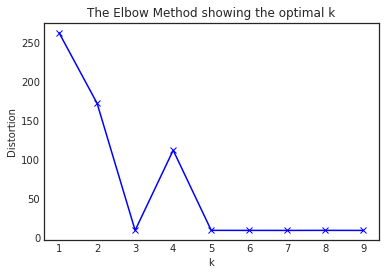

In [653]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(nyc_grouped_clustering)
    distortions.append(sum(np.min(cdist(nyc_grouped_clustering, kmeanModel.cluster_centers_, 'canberra'), axis=1)) / nyc_grouped_clustering.shape[0])

#There are different metric distance function for spatial distance. 
#I choose correlation instaed of euclidean because the canberra function gives me more clear view of elbow break point.

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Based on the plot above, **K=4** will be our optimum clustering that i will use for the rest of the project.

Let's create a new dataframe that includes the cluster as well as the **top 3** venues for each neighborhood.

In [655]:
# add clustering labels
#neighborhoods_venues_sorted = neighborhoods_venues_sorted.drop('Cluster Labels', 1)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

nyc_merged = nyc_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
nyc_merged = nyc_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

nyc_merged.dropna(inplace=True) # check the last columns!
nyc_merged = nyc_merged.astype({'Cluster Labels':int})
nyc_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,AHP,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Bronx,Wakefield,40.894705,-73.847201,353173,2,Dessert Shop,Caribbean Restaurant,Ice Cream Shop
1,Bronx,Co-op City,40.874294,-73.829939,430000,1,Pizza Place,Pharmacy,Discount Store
2,Bronx,Eastchester,40.887556,-73.827806,333493,1,Caribbean Restaurant,Seafood Restaurant,Diner
3,Bronx,Fieldston,40.895437,-73.905643,941749,2,Plaza,Bus Station,River
4,Bronx,Riverdale,40.890834,-73.912585,388878,2,Park,Plaza,Baseball Field


Finally, let's visualize the resulting clusters

In [670]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nyc_merged['Latitude'], nyc_merged['Longitude'], nyc_merged['Neighborhood'], nyc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters.save('map1.html')
map_clusters

#### C.2. Categorizing NYC Neighboors Venues

In [657]:
df_nyc = nyc_merged[['Cluster Labels', '1st Most Common Venue']]
df_nyc.columns = ['Cluster', 'Venue' ]
df_nyc.head()

,Cluster,Venue
0,2,Dessert Shop
1,1,Pizza Place
2,1,Caribbean Restaurant
3,2,Plaza
4,2,Park


In this study, we have **266** venues and for the sake of simplifying the visualization, i did perform manual categorization of common purpose venues

In [658]:
#df_nyc.Venue[df_nyc.Venue.str.contains('Restaurant')] = 'Restaurant'
df_nyc.Venue.loc[df_nyc.Venue.str.contains('Stadium|Theater|Cinema|Court|Athletics|Bowling|Recreation')] = 'Entertaiment Facilities'
df_nyc.Venue.loc[df_nyc.Venue.str.contains('Store|store|Shop|Bakery|Market|Butcher')] = 'Shoping Facilities'
df_nyc.Venue.loc[df_nyc.Venue.str.contains('Bar|Lounge|Brewery|Arcade|Pub|Beer|Club|Nightlife')] = 'Bar/Club'
df_nyc.Venue.loc[df_nyc.Venue.str.contains('Restaurant|Food|Deli|Sandwich|Soup|Salad|Poke|Joint|Pizza|Diner|Food|Steak|Breakfast|Snack', na=False)] = 'Restaurant'
df_nyc.Venue.loc[df_nyc.Venue.str.contains('Gym|Studio|Spy|Pharmacy|Nail|Bank|Rental|Service', na=False)] = 'Services'
df_nyc.Venue.loc[df_nyc.Venue.str.contains('Bus|Gas', na=False)] = 'Transport'
df_nyc.Venue.loc[df_nyc.Venue.str.contains('Beach|Surf|Pier|Harbor|Waste', na=False)] = 'Water Facilities'
df_nyc.Venue.loc[df_nyc.Venue.str.contains('Hostel|Hotel|Spa', na=False)] = 'Hotel/Spa'
df_nyc.Venue.loc[df_nyc.Venue.str.contains('Park|Playground|Outdoors|Run', na=False)] = 'Park'
df_nyc.Venue.loc[df_nyc.Venue.str.contains('Plaza|Landmark|Sculpture|Museum|Historic', na=False)] = 'Monument/Landmark'

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [659]:
df_nyc['count'] = 1
result = df_nyc.pivot_table(
    index=['Venue'], columns='Cluster', values='count',
    fill_value=0, aggfunc=np.sum
)

result = result.transpose()
result.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Venue,Bar/Club,Café,Entertaiment Facilities,Hotel/Spa,Intersection,Monument/Landmark,Moving Target,Park,Restaurant,Services,Shoping Facilities,Transport,Water Facilities
Cluster,,,,,,,,,,,,,
0,2,1,0,0,0,0,0,1,21,1,7,0,0
1,1,0,0,0,0,0,0,1,35,6,3,1,0
2,8,0,4,2,1,4,1,9,43,10,21,2,7


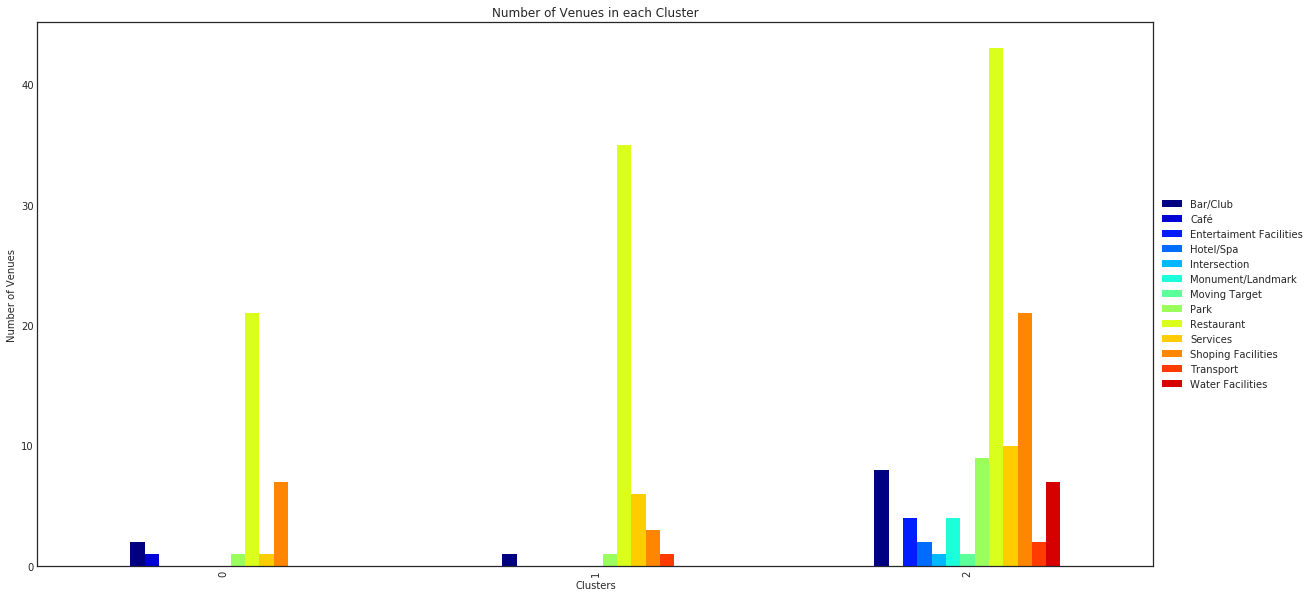

In [660]:
# set color scheme for the clusters
colors_array = cm.jet(np.linspace(0, 1, result.shape[1]+1))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# generate histogram
result.plot(kind='bar', figsize=(20, 10), color=rainbow, stacked=False)
#plt.style.use('ggplot')
plt.style.use('seaborn-white')


plt.title('Number of Venues in each Cluster')
plt.ylabel('Number of Venues')
plt.xlabel('Clusters')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

When I examine above graph I can label each cluster as follows:

- Cluster 0 : **“Meetings&Comercial Venues”**
- Cluster 1 : **“Restaurants&Services Venues”**
- Cluster 2 : **“Multiple Social Venues”**

Next, we will focus on the Average Home Pricing. 

In [661]:
df_sales = list(nyc_merged.AHP.values)

(array([136.,  31.,  17.,   5.,   3.]),
 array([ 143870. ,  687837.2, 1231804.4, 1775771.6, 2319738.8, 2863706. ]),
 <a list of 5 Patch objects>)

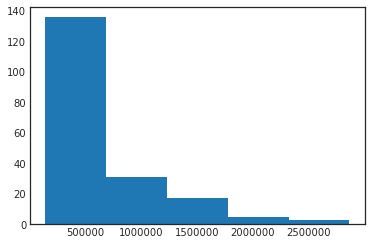

In [662]:
plt.hist(df_sales, bins=5)

As it seems from above histogram, we can define the ranges as below:

- 680k AHP : **“Low Level HSP”**
- 650K–1.2M AHP : **“Mid-1 Level HSP”**
- 1.2M–1.7M AHP : **“Mid-2 Level HSP”**
- 1.7M–2.3M AHP : **“High-1 Level HSP”**
- 2.3M AHP : **“High-2 Level HSP”**

***Hidden Area***
<!--
count_df = df_sales.groupby(pd.cut(df_sales["AHP"], np.arange(100000, 4800000, 300000))).count()

count_df.columns = [['Count']]

count_df.head()
-->

### **D. Results**  <a name="results"></a>

In this section, we will summarize all the finding just describes above. 
so, for that, i will generate **Master Table** with all the data collected so far.

In [663]:
nyc_merged.head()

,Borough,Neighborhood,Latitude,Longitude,AHP,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Bronx,Wakefield,40.894705,-73.847201,353173,2,Dessert Shop,Caribbean Restaurant,Ice Cream Shop
1,Bronx,Co-op City,40.874294,-73.829939,430000,1,Pizza Place,Pharmacy,Discount Store
2,Bronx,Eastchester,40.887556,-73.827806,333493,1,Caribbean Restaurant,Seafood Restaurant,Diner
3,Bronx,Fieldston,40.895437,-73.905643,941749,2,Plaza,Bus Station,River
4,Bronx,Riverdale,40.890834,-73.912585,388878,2,Park,Plaza,Baseball Field


for that **nyc_merged** table will be enhanced, we will just add all categorizations done above for AHP in **'HSP level'** and Venues Clusters in **'Area Class'**. 

In [664]:
nyc_merged['HSP level'] = 1
nyc_merged['Area Class'] = 1

for index, row in nyc_merged.iterrows():
    if nyc_merged.loc[index, 'AHP'] < 650000:
        nyc_merged.loc[index, 'HSP level'] = 'Low Level HSP'
    elif (nyc_merged.loc[index, 'AHP'] >= 650000) and (nyc_merged.loc[index, 'AHP'] < 1200000) :
        nyc_merged.loc[index, 'HSP level'] = 'Mid-1 Level HSP'
    elif (nyc_merged.loc[index, 'AHP'] >= 1200000) and (nyc_merged.loc[index, 'AHP'] < 1700000) :
        nyc_merged.loc[index, 'HSP level'] = 'Mid-2 Level HSP'
    elif (nyc_merged.loc[index, 'AHP'] >= 1700000) and (nyc_merged.loc[index, 'AHP'] < 2300000) :
        nyc_merged.loc[index, 'HSP level'] = 'High-1 Level HSP'
    else :
        nyc_merged.loc[index, 'HSP level'] = 'High-2 Level HSP'
        
    if nyc_merged.loc[index, 'Cluster Labels'] == 0:
        nyc_merged.loc[index, 'Area Class'] = 'Meetings&Comercial Venues'
    elif nyc_merged.loc[index, 'Cluster Labels'] == 1:
        nyc_merged.loc[index, 'Area Class'] = 'Restaurants&Services Venues'
    else:
        nyc_merged.loc[index, 'Area Class'] = 'Multiple Social Venues'

nyc_merged.head()     
#nyc_merged['HSP level'] = np.where(nyc_merged['AHP']<1000000, 'yes', 'no')

,Borough,Neighborhood,Latitude,Longitude,AHP,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,HSP level,Area Class
0,Bronx,Wakefield,40.894705,-73.847201,353173,2,Dessert Shop,Caribbean Restaurant,Ice Cream Shop,Low Level HSP,Multiple Social Venues
1,Bronx,Co-op City,40.874294,-73.829939,430000,1,Pizza Place,Pharmacy,Discount Store,Low Level HSP,Restaurants&Services Venues
2,Bronx,Eastchester,40.887556,-73.827806,333493,1,Caribbean Restaurant,Seafood Restaurant,Diner,Low Level HSP,Restaurants&Services Venues
3,Bronx,Fieldston,40.895437,-73.905643,941749,2,Plaza,Bus Station,River,Mid-1 Level HSP,Multiple Social Venues
4,Bronx,Riverdale,40.890834,-73.912585,388878,2,Park,Plaza,Baseball Field,Low Level HSP,Multiple Social Venues


**Finally**, let's visualize the resulting clusters and Pricing ranges in NYC maps. The result can give better visualization of any correlations between those features. 


In [665]:
# download NYC nieghborhoods borders geojson file
!wget --no-check-certificate https://gist.github.com/pstuffa/38111aa2e3077baa67f1d0c42df9bf08/raw/5a2dbefc06154bbbd1c35f3f5b15b336a67ccc09/nyc.json -q -O 'nyc_neigh_border.json'
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [666]:
nyc_dist_geo = r'nyc_neigh_border.json' # geojson file

Creating the Map using NYC coordinates "latitude", "longitude"

In [671]:
nyc_map = folium.Map(location=[latitude, longitude], zoom_start=10)

Now its time to display the clustering of Neighborhoods associated with proper labeling

In [672]:
# add markers to the map
markers_colors = ['#ff00ff', '#0000ff', '#008000']
for lat, lon, poi, cluster, area, cost in zip(nyc_merged['Latitude'], nyc_merged['Longitude'], nyc_merged['Neighborhood'], nyc_merged['Cluster Labels'],nyc_merged['Area Class'], nyc_merged['HSP level'] ):
    label = folium.Popup(str(poi) + ' Cluster:' + str(cluster)+" / " + str(area) + " - " + str(cost), parse_html=True)
    if cluster == 3:
        cluster = 2
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=markers_colors[cluster],
        fill=True,
        fill_color=markers_colors[cluster],
        fill_opacity=0.2).add_to(nyc_map)

nyc_map.save('map.html')

# display map may not work if your notebook doesn't support rendering large visuals
nyc_map
 

As a final observation to the data will be to focus on the coupling of Home pricing and the venues classes, for that i will Generate **Choropleth** map using the Average Home Pricing of neighborhoods in NYC from 2016 to 2017, in this map only **190 neighborhoods** that been used for this study, the excluded area will be blanked.  

In [673]:
# generate choropleth map using the Average Home Pricing of neighborhoods in NYC from 2016 to 2017
nyc_map.choropleth(
    geo_data=nyc_dist_geo,
    data=nyc_merged,
    columns=['Neighborhood', 'AHP'],
    key_on='feature.properties.neighborhood',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    bins=5,
    legend_name='Average Home Pricing',
    highlight=True
)

nyc_map.save('map1.html')

# display map may not work if your notebook doesn't support rendering large visuals
nyc_map

### **E. Discussion**  <a name="discussion"></a>

As mentioned before, NYC is a big city with a high population density in a narrow area. The total number of measurements and population densities of the 5 districts in total can vary. As there is such a complexity, very different approaches can be tried in clustering and classification studies. Moreover, it is obvious that not every classification method can yield the same high quality results for this metropol.

I used the **Kmeans** algorithm as part of this clustering study. When I tested the Elbow method, I set the optimum k value to **3**. However, only **190 neighboors** coordinates with a limit of **10 Venues** were used. For more detailed and accurate guidance, the data set can be expanded and the details of the neighborhood or street can also be drilled.

I also performed **data analysis** through this information by correlating the **clustering of neighborhoods venues** and **Home Sales Pricing Averages** data using row static data on GitHub. In future studies, these data can also be accessed dynamically from specific platforms or packages.

I ended the study by visualizing the data and clustering information on the NYC map. In future studies, web or telephone applications can be carried out to direct investors.

### **F. Conclusion**  <a name="conclusion"></a>
As a conclusion, i clearly see that may factors can influence the pricing especially in NYC where the populations and facilities are in high density. 

Based on the correlated data between Venues and Home pricing, places with high socializations and life facilities like restaurants,Bars.., seem to boost real estate's value the most especially in dense urban area like Manhattan and upper Brooklyn neighborhoods. But also it seems that this model is not always true in different district like State Island where urban density is lower, in this case the geographical location like sea side, park side, silent neighborhood matter more.

And as a result more detailed and accurate guidance, can help in expanding the datasets and the details of the neighborhood or street can also be drilled to mine more insight understanding of such complicated and diverse city like NYC.

### **G. References**  <a name="references"></a>

* [1] [New York City - Wikipedia](https://en.wikipedia.org/wiki/New_York_City)
* [2] [Forsquare API](https://developer.foursquare.com/)
* [3] [NYC Property Sales from "Kaggle"](https://www.kaggle.com/new-york-city/nyc-property-sales)
* [4] [Google Map](https://www.google.com/maps/)